<a href="https://colab.research.google.com/github/Ebratul/Python/blob/main/NLP/NLP1_Duplicate_Question_Pairs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/quora/question-pairs-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: g65ashaharier21031
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset


100%|██████████| 20.8M/20.8M [00:00<00:00, 893MB/s]

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"/content/question-pairs-dataset/questions.csv")

In [6]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
63866,63866,127003,127004,Do witches and vampires exist?,Do vampires really exist?,0
369218,369218,722565,722566,How do you translate the word 'thank you' in T...,Can someone translate this Tamil song to English?,0
39409,39409,78505,78506,What are some of the best places to visit in p...,Which is the best place in Pune?,1
238595,238595,469995,469996,How do I activate an inactive Instagram account?,How do I Re-activate my instagram account?,1
99933,99933,198305,198306,Stephen Hsu (physicist): What does Stephen Hsu...,Stephen Hsu (physicist): What does Stephen Hsu...,0
225737,225737,444904,444905,Is being a sociopath a bad thing?,Would a sociopath be depressed about being a s...,0
57350,57350,114101,114102,What are some good questions to ask on a secon...,What are the best questions to ask on a first ...,0
126641,126641,250899,250900,Hiiii sylvia where r u from?,How and when do CGI companies upgrade their co...,0
309952,309952,608457,608458,What if everyone was bisexual?,Why isn't everyone bisexual?,0
207452,207452,409251,409252,"If women make 77% of what men make, why doesn'...","If women make less than men for the same job, ...",1


In [9]:
print(df.loc[238061, 'question1'])
#print(df['question1'].iloc[0])

How will banning Rs. 500 and Rs. 1000 notes help in overcoming corruption in India?


In [10]:
print(df.loc[238061, 'question2'])

How will replacing 1000 notes with 2000 notes going to stop corruption and black money?


In [11]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['is_duplicate'].value_counts()

,count
is_duplicate,
0,255045
1,149306


In [14]:
df['is_duplicate'].count()

np.int64(404351)

<Axes: xlabel='is_duplicate'>

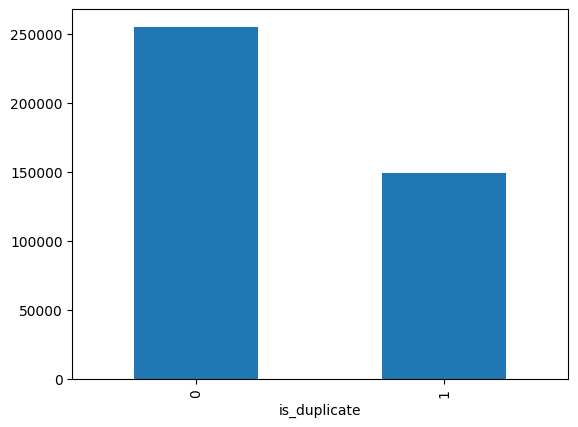

In [15]:
df['is_duplicate'].value_counts().plot(kind ='bar')
#plt.bar(x, y)

In [16]:
print("percentage(%)")
(df['is_duplicate'].value_counts() / df['is_duplicate'].count())*100

percentage(%)


,count
is_duplicate,
0,63.07515
1,36.92485


In [17]:
#unbalanced data

In [18]:
#repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions ', np.unique(qid).shape[0])

Number of unique questions  789801


In [19]:
qid.value_counts().values

array([50, 47, 41, ...,  1,  1,  1])

In [20]:
x = qid.value_counts() > 1
print('number of question getting repeated', x[x].shape[0])

number of question getting repeated 13698


In [21]:
np.unique(qid).shape

(789801,)

In [22]:
x

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
530741,False
530743,False
530745,False
530747,False


In [23]:
x.value_counts()

,count
count,
False,776103
True,13698


<Axes: xlabel='count'>

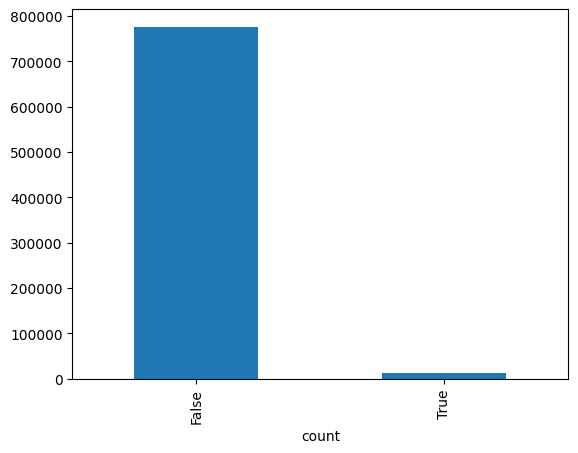

In [24]:
x.value_counts().plot(kind = 'bar')

In [25]:
x[x]

# x[x] মানে হলো:
# 👉 যে রো-গুলোতে x এর মান True, শুধু সেগুলোই রাখো।
# 👉 False থাকা রো গুলো বাদ দাও।

,count
65333,True
7863,True
147324,True
2628,True
196396,True
...,...
162499,True
109338,True
210212,True
113586,True


In [26]:
x[x].value_counts()

,count
count,
True,13698


In [27]:
x[~x]

,count
256089,False
265789,False
265822,False
255999,False
267907,False
...,...
530741,False
530743,False
530745,False
530747,False


In [28]:
import matplotlib.pyplot as plt

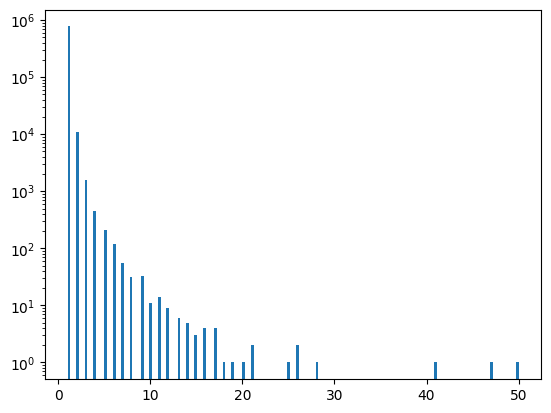

In [29]:
#repreated question histogram

plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [30]:
qid.value_counts().max()

50

In [31]:
#incrimental learning => vacx, dask

In [32]:
df = df.sample(10000)

In [33]:
p_df = df

In [34]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
q_df = df[['question1','question2']]
q_df

,question1,question2
169378,What is a swamp? How are they formed?,How are swamps formed?
314262,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?
162006,How do I know if I'm pretty or not?,How do you know if you are pretty?
164771,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...
351681,How does cum taste?,What does cum taste like?
...,...,...
19805,What are the benefits of reading books?,What are some benefits of reading?
310237,What are some biblical examples of God giving ...,"If God doesn't give more than one can handle, ..."
157196,How can I know my wife has had an affair?,How can I know if my wife is a cheater?
279409,What is the difference between GMO and selecti...,What is the difference between GMOs and conven...


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [38]:
#marge text

question = list(q_df['question1']) +list(q_df['question2'])
# len(question)

In [39]:
cv = CountVectorizer(max_features=3000)

In [40]:
# val = cv.fit(question)
cv.fit_transform(question).toarray()
# np.vsplit(full_array, 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(), 2)

In [42]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df1], axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
169378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
351681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
temp_df1.shape

(10000, 3000)

In [44]:
temp_df.shape

(10000, 6000)

In [45]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
169378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
314262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164771,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
351681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
310237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
279409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
x = temp_df.iloc[:,0:-1]
y = temp_df.iloc[:,-1]
y

,is_duplicate
169378,1
314262,0
162006,1
164771,0
351681,1
...,...
19805,1
310237,0
157196,1
279409,1


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [48]:
# temp_df.iloc[:,0:-1].values

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# rf = RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_depth =500)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6964

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.to_numpy(), y_train.to_numpy())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
y_pred = xgb.predict(x_test.to_numpy())
accuracy_score(y_test.to_numpy(), y_pred)

0.6888

#Feature Engineering

In [53]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [54]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
169378,169378,334719,334720,What is a swamp? How are they formed?,How are swamps formed?,1,37,22
314262,314262,616760,616761,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?,0,58,44
162006,162006,320296,320297,How do I know if I'm pretty or not?,How do you know if you are pretty?,1,35,34
164771,164771,325713,325714,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...,0,80,79
351681,351681,688909,688910,How does cum taste?,What does cum taste like?,1,19,25


In [55]:
#num of word
df['q1_num_word'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_num_word'] = df['question2'].apply(lambda x: len(x.split(" ")))

In [56]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
169378,169378,334719,334720,What is a swamp? How are they formed?,How are swamps formed?,1,37,22,8,4
314262,314262,616760,616761,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?,0,58,44,11,10
162006,162006,320296,320297,How do I know if I'm pretty or not?,How do you know if you are pretty?,1,35,34,9,8
164771,164771,325713,325714,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...,0,80,79,17,12
351681,351681,688909,688910,How does cum taste?,What does cum taste like?,1,19,25,4,5


In [57]:
[set(map(lambda x: x.lower().strip(), "What is is Elon Elon Musk's vision of Tesla Motors?".split(" ")))]

[{'elon', 'is', 'motors?', "musk's", 'of', 'tesla', 'vision', 'what'}]

In [58]:
"       What is is Elon Elon Musk's vision of Tesla Motors?          ".lower().strip()

"what is is elon elon musk's vision of tesla motors?"

In [59]:
#common word
def common_word(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [60]:
df['word_common'] = df.apply(common_word, axis = 1)
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
169378,169378,334719,334720,What is a swamp? How are they formed?,How are swamps formed?,1,37,22,8,4,3
314262,314262,616760,616761,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?,0,58,44,11,10,6
162006,162006,320296,320297,How do I know if I'm pretty or not?,How do you know if you are pretty?,1,35,34,9,8,4
164771,164771,325713,325714,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...,0,80,79,17,12,0
351681,351681,688909,688910,How does cum taste?,What does cum taste like?,1,19,25,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...
19805,19805,39519,39520,What are the benefits of reading books?,What are some benefits of reading?,1,39,34,7,6,4
310237,310237,609012,609013,What are some biblical examples of God giving ...,"If God doesn't give more than one can handle, ...",0,79,124,14,21,8
157196,157196,310856,310857,How can I know my wife has had an affair?,How can I know if my wife is a cheater?,1,41,39,10,10,6
279409,279409,549301,549302,What is the difference between GMO and selecti...,What is the difference between GMOs and conven...,1,58,62,9,9,7


In [61]:
#total word

def total_words(row):
  w1 = set(map(lambda x: x.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda x: x.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [62]:
df['word_total'] = df.apply(total_words,  axis = 1)

In [63]:
df['word_share'] = round(df['word_common'] / df['word_total'], 2)

In [64]:
# analysis of feature
import seaborn as sb

minimum charactes 4
maximum charactes 430
avg n um of charactes 59.4294


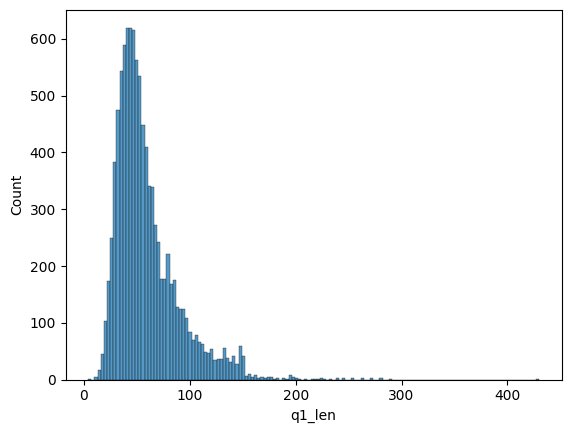

In [65]:
#EDA
sb.histplot(df['q1_len'])
print('minimum charactes', df['q1_len'].min())
print('maximum charactes', df['q1_len'].max())
print('avg n um of charactes', (df['q1_len'].mean()))

minimum charactes 12
maximum charactes 581
avg n um of charactes 59.5808


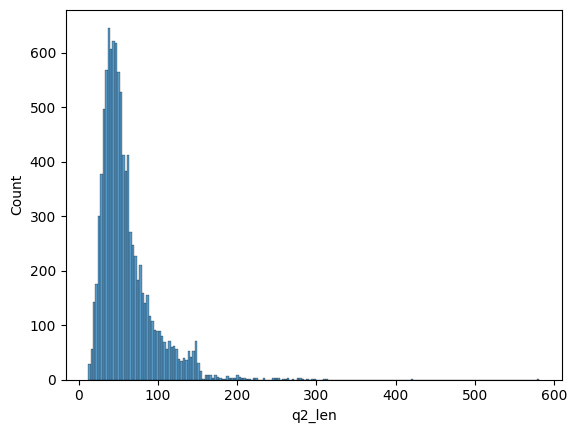

In [66]:
#EDA
sb.histplot(df['q2_len'])
print('minimum charactes', df['q2_len'].min())
print('maximum charactes', df['q2_len'].max())
print('avg n um of charactes', (df['q2_len'].mean()))

minimum charactes 1
maximum charactes 81
avg n um of charactes 10.9611


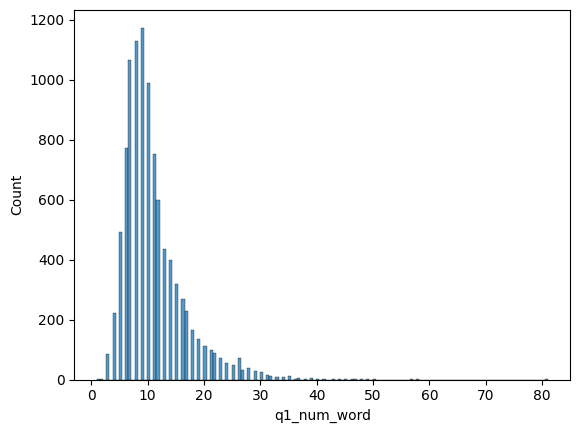

In [67]:
#EDA
sb.histplot(df['q1_num_word'])
print('minimum charactes', df['q1_num_word'].min())
print('maximum charactes', df['q1_num_word'].max())
print('avg n um of charactes', (df['q1_num_word'].mean()))

minimum charactes 3
maximum charactes 118
avg n um of charactes 11.102


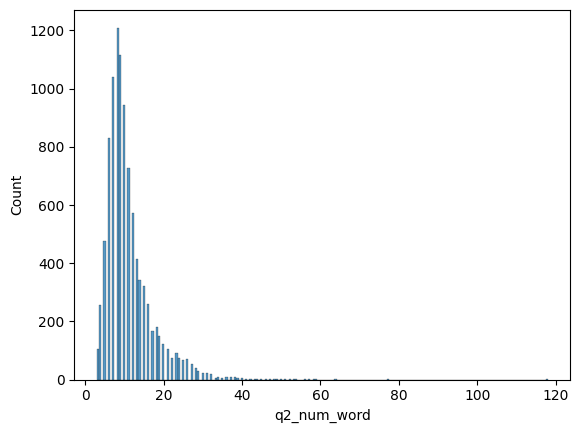

In [68]:
#EDA
sb.histplot(df['q2_num_word'])
print('minimum charactes', df['q2_num_word'].min())
print('maximum charactes', df['q2_num_word'].max())
print('avg n um of charactes', (df['q2_num_word'].mean()))

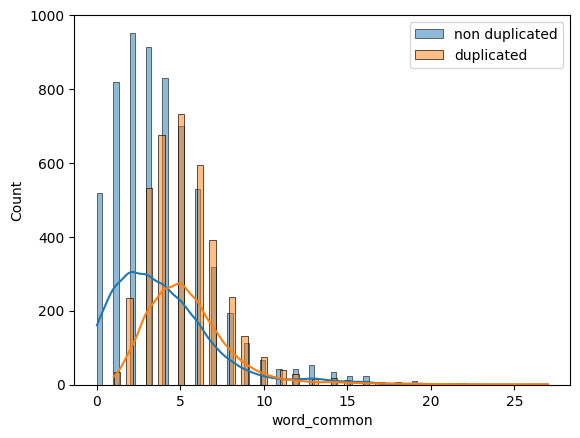

In [69]:
#common word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_common'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_common'], label = 'duplicated', kde = True)
plt.legend()
plt.show()


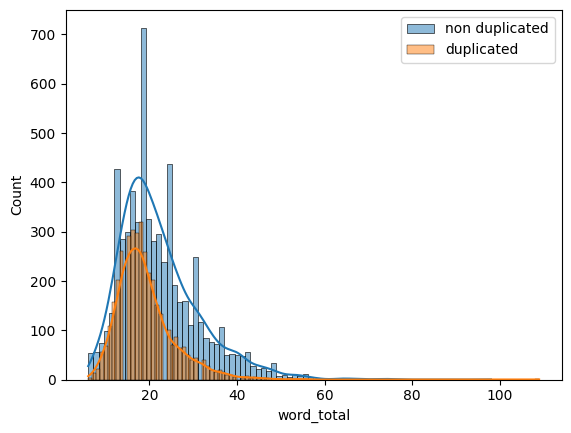

In [70]:
#total word
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_total'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_total'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

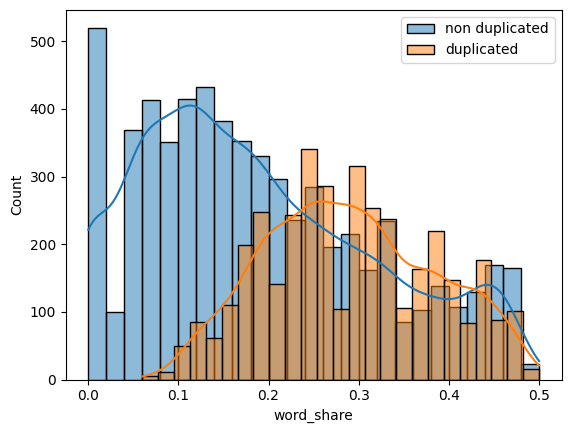

In [71]:
#total share
#EDA
sb.histplot(df[df['is_duplicate'] == 0]['word_share'], label = 'non duplicated',kde= True)
sb.histplot(df[df['is_duplicate'] == 1]['word_share'], label = 'duplicated', kde = True)
plt.legend()
plt.show()

In [72]:
qq_df = df[['question1', 'question2']]
qq_df

,question1,question2
169378,What is a swamp? How are they formed?,How are swamps formed?
314262,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?
162006,How do I know if I'm pretty or not?,How do you know if you are pretty?
164771,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...
351681,How does cum taste?,What does cum taste like?
...,...,...
19805,What are the benefits of reading books?,What are some benefits of reading?
310237,What are some biblical examples of God giving ...,"If God doesn't give more than one can handle, ..."
157196,How can I know my wife has had an affair?,How can I know if my wife is a cheater?
279409,What is the difference between GMO and selecti...,What is the difference between GMOs and conven...


In [73]:
f_df = df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])

In [74]:
f_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
169378,1,37,22,8,4,3,12,0.25
314262,0,58,44,11,10,6,21,0.29
162006,1,35,34,9,8,4,16,0.25
164771,0,80,79,17,12,0,29,0.00
351681,1,19,25,4,5,2,9,0.22
...,...,...,...,...,...,...,...,...
19805,1,39,34,7,6,4,13,0.31
310237,0,79,124,14,21,8,35,0.23
157196,1,41,39,10,10,6,20,0.30
279409,1,58,62,9,9,7,18,0.39


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(df['question1']) + list(df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [76]:
cv.fit_transform(questions).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
temp_df1 = pd.DataFrame(q1_arr, index = qq_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = qq_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(10000, 6000)

In [78]:
d_df = pd.concat([f_df, temp_df], axis = 1)
d_df.shape

(10000, 6008)

In [79]:
d_df

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
169378,1,37,22,8,4,3,12,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
314262,0,58,44,11,10,6,21,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
162006,1,35,34,9,8,4,16,0.25,0,0,...,0,0,0,2,0,0,0,0,0,0
164771,0,80,79,17,12,0,29,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
351681,1,19,25,4,5,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,1,39,34,7,6,4,13,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
310237,0,79,124,14,21,8,35,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0
157196,1,41,39,10,10,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
279409,1,58,62,9,9,7,18,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
x = d_df.iloc[:,1::]
y = d_df.iloc[:,0]

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train.values, y_train.values)


RandomForestClassifier()

In [83]:
y_pred = rf.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.7408

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train.values, y_train.values)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_pred = xgb.predict(x_test.values)
accuracy_score(y_test.values, y_pred)

0.748

In [86]:
#Advanced Feature
# token feature
# length based feature
# fuzzy feature

In [87]:
replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
replacements.items()

dict_items([('%', ' percent '), ('$', ' dollar '), ('₹', ' rupee '), ('€', ' euro '), ('@', ' at '), ('&', ' and '), ('+', ' plus ')])

In [88]:
import string
from bs4 import BeautifulSoup
import re

In [89]:
import re
import string
from bs4 import BeautifulSoup

def preprocess(q):
    # convert into string, lowercase and trim
    q = str(q).lower().strip()

    # Replace some symbols with word equivalents
    replacements = {
        '%': ' percent ',
        '$': ' dollar ',
        '₹': ' rupee ',
        '€': ' euro ',
        '@': ' at ',
        '&': ' and ',
        '+': ' plus ',
    }
    for k, v in replacements.items():
        q = q.replace(k, v)

    # Remove special tag [math]
    q = q.replace('[math]', '')

    # Replace large numeric patterns
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)  # billion
    q = re.sub(r'([0-9]+)000000', r'\1m', q)      # million
    q = re.sub(r'([0-9]+)000', r'\1k', q)         # thousand

    # Expand common English contractions
    contractions = {
    # Common negative contractions
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "isn't": "is not",
    "mustn't": "must not",
    "mightn't": "might not",
    "might've": "might have",
    "must've": "must have",
    "needn't": "need not",
    "shan't": "shall not",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "wasn't": "was not",
    "weren't": "were not",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "ain't": "is not",

    # Pronoun contractions
    "i'm": "i am",
    "i'd": "i would",
    "i've": "i have",
    "i'll": "i will",
    "you're": "you are",
    "you'd": "you would",
    "you've": "you have",
    "you'll": "you will",
    "he's": "he is",
    "he'd": "he would",
    "he'll": "he will",
    "she's": "she is",
    "she'd": "she would",
    "she'll": "she will",
    "they're": "they are",
    "they'd": "they would",
    "they've": "they have",
    "they'll": "they will",
    "we're": "we are",
    "we'd": "we would",
    "we've": "we have",
    "we'll": "we will",

    # Verb + not with short forms
    "daren't": "dare not",
    "needn't": "need not",
    "oughtn't": "ought not",

    # Modal/Helping verb contractions
    "let's": "let us",
    "here's": "here is",
    "there's": "there is",
    "that's": "that is",
    "what's": "what is",
    "who's": "who is",
    "where's": "where is",
    "when's": "when is",
    "why's": "why is",
    "how's": "how is",

    # Informal / slang contractions
    "y'all": "you all",
    "innit": "is it not",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "kinda": "kind of",
    "sorta": "sort of",
    "lemme": "let me",
    "gimme": "give me",
    "ain't": "is not"
}

    for c, v in contractions.items():
        q = q.replace(c, v)

    # Expanding remaining "'t", "'ve", "'re", "'ll"
    q = q.replace("n't", " not")
    q = q.replace("'ve", " have")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove punctuation
    q = q.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    q = re.sub(r'\s+', ' ', q).strip()

    return q


In [90]:
test = "Hello!!! <b>I'm</b> 1000000% sure &amp; I can't do this!"
print(preprocess(test))

hello i am 1m percent sure and amp i cannot do this


In [91]:
BeautifulSoup("<b>I'm</b>", "html.parser").get_text()

"I'm"

In [92]:
p_df['question1'] = p_df['question1'].apply(preprocess)
p_df['question2'] = p_df['question2'].apply(preprocess)

In [93]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share
169378,169378,334719,334720,what is a swamp how are they formed,how are swamps formed,1,37,22,8,4,3,12,0.25
314262,314262,616760,616761,how do i heal zepto malware infected files in ...,how can i get rid of malware in my computer,0,58,44,11,10,6,21,0.29
162006,162006,320296,320297,how do i know if i am pretty or not,how do you know if you are pretty,1,35,34,9,8,4,16,0.25
164771,164771,325713,325714,what is the best way to prepare for gate in cs...,will we get control of intractable brain disea...,0,80,79,17,12,0,29,0.00
351681,351681,688909,688910,how does cum taste,what does cum taste like,1,19,25,4,5,2,9,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,19805,39519,39520,what are the benefits of reading books,what are some benefits of reading,1,39,34,7,6,4,13,0.31
310237,310237,609012,609013,what are some biblical examples of god giving ...,if god does not give more than one can handle ...,0,79,124,14,21,8,35,0.23
157196,157196,310856,310857,how can i know my wife has had an affair,how can i know if my wife is a cheater,1,41,39,10,10,6,20,0.30
279409,279409,549301,549302,what is the difference between gmo and selecti...,what is the difference between gmos and conven...,1,58,62,9,9,7,18,0.39


In [94]:
p_df['q1_len'] = p_df['question1'].str.len()
p_df['q2_len'] = p_df['question2'].str.len()

In [95]:
p_df['q1_num_words'] = p_df['question1'].apply(lambda x: len(x.split(" ")))
p_df['q2_num_words'] = p_df['question2'].apply(lambda x: len(x.split(" ")))

In [96]:
def common_words(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1 & w2)

In [97]:
p_df['word_common'] = p_df.apply(common_words, axis=1)

In [98]:
def total_word(df):
  w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
  return len(w1) + len(w2)

In [99]:
p_df['word_total'] = p_df.apply(total_word, axis=1)

In [100]:
p_df['word_share'] = round(p_df['word_common'] / p_df['word_total'] , 2)
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words
169378,169378,334719,334720,what is a swamp how are they formed,how are swamps formed,1,35,21,8,4,3,12,0.25,8,4
314262,314262,616760,616761,how do i heal zepto malware infected files in ...,how can i get rid of malware in my computer,0,57,43,11,10,6,21,0.29,11,10
162006,162006,320296,320297,how do i know if i am pretty or not,how do you know if you are pretty,1,35,33,9,8,5,16,0.31,10,8
164771,164771,325713,325714,what is the best way to prepare for gate in cs...,will we get control of intractable brain disea...,0,77,78,17,12,0,29,0.00,17,12
351681,351681,688909,688910,how does cum taste,what does cum taste like,1,18,24,4,5,3,9,0.33,4,5


In [101]:
# Advanced Feature

from nltk.corpus import stopwords

In [102]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_tokens_features(row):
    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001
    stop_words = stopwords.words('english')
    token_feature = [0.0] * 8

    # Convert sentences into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_feature

    # Non-stopwords
    q1_word  = set([word for word in q1_tokens if word not in stop_words])
    q2_word  = set([word for word in q2_tokens if word not in stop_words])

    # Stopwords
    q1_stop = set([word for word in q1_tokens if word in stop_words])
    q2_stop = set([word for word in q2_tokens if word in stop_words])

    # Common counts
    common_word_count = len(q1_word.intersection(q2_word))
    common_stop_count = len(q1_stop.intersection(q2_stop))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Features
    token_feature[0] = common_word_count / (min(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[1] = common_word_count / (max(len(q1_word), len(q2_word)) + SAFE_DIV)
    token_feature[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_feature[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_feature[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # First and last word match
    token_feature[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_feature[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_feature


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [103]:
token_feature = p_df.apply(fetch_tokens_features, axis = 1)


p_df['cwc_min'] = list(map(lambda x:x[0], token_feature))
p_df['cwc_max'] = list(map(lambda x:x[1], token_feature))
p_df['csc_min'] = list(map(lambda x:x[2], token_feature))
p_df['csc_max'] = list(map(lambda x:x[3], token_feature))
p_df['ctc_min'] = list(map(lambda x:x[4], token_feature))
p_df['ctc_max'] = list(map(lambda x:x[5], token_feature))
p_df['last_word_eq'] = list(map(lambda x:x[6], token_feature))
p_df['first_word_eq'] = list(map(lambda x:x[7], token_feature))


In [104]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,q1_num_words,q2_num_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
169378,169378,334719,334720,what is a swamp how are they formed,how are swamps formed,1,35,21,8,4,...,8,4,0.499975,0.499975,0.999950,0.333328,0.749981,0.374995,1,0
314262,314262,616760,616761,how do i heal zepto malware infected files in ...,how can i get rid of malware in my computer,0,57,43,11,10,...,11,10,0.499988,0.333328,0.799984,0.666656,0.599994,0.545450,1,1
162006,162006,320296,320297,how do i know if i am pretty or not,how do you know if you are pretty,1,35,33,9,8,...,10,8,0.999950,0.999950,0.599988,0.428565,0.624992,0.499995,0,1
164771,164771,325713,325714,what is the best way to prepare for gate in cs...,will we get control of intractable brain disea...,0,77,78,17,12,...,17,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
351681,351681,688909,688910,how does cum taste,what does cum taste like,1,18,24,4,5,...,4,5,0.999950,0.666644,0.499975,0.499975,0.749981,0.599988,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,19805,39519,39520,what are the benefits of reading books,what are some benefits of reading,1,38,33,7,6,...,7,6,0.999950,0.666644,0.749981,0.749981,0.833319,0.714276,0,1
310237,310237,609012,609013,what are some biblical examples of god giving ...,if god does not give more than one can handle ...,0,78,124,14,21,...,14,23,0.499992,0.333330,0.624992,0.416663,0.571424,0.347825,1,0
157196,157196,310856,310857,how can i know my wife has had an affair,how can i know if my wife is a cheater,1,40,38,10,10,...,10,10,0.666644,0.666644,0.571420,0.571420,0.599994,0.599994,0,1
279409,279409,549301,549302,what is the difference between gmo and selecti...,what is the difference between gmos and conven...,1,57,61,9,9,...,9,9,0.499988,0.499988,0.999980,0.999980,0.777769,0.777769,1,1


#Length Based feature

In [105]:
from nltk.metrics import distance

In [106]:
def longest_common_substring(s1, s2):
    max_len = 0
    for i in range(len(s1)):
        for j in range(len(s2)):
            length = 0
            while i + length < len(s1) and j + length < len(s2) and s1[i + length] == s2[j + length]:
                length += 1
            max_len = max(max_len, length)
    return max_len


In [107]:
def fetch_length_features(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])

    length_features = [0.0]*3

    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average token length
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest common substring ratio
    lcs_len = longest_common_substring(q1, q2)
    length_features[2] = lcs_len / (min(len(q1), len(q2)) + 1)

    return length_features


In [108]:
length_feature = p_df.apply(fetch_length_features, axis = 1)

In [109]:
length_feature

,0
169378,"[4, 6.0, 0.36363636363636365]"
314262,"[1, 10.5, 0.3409090909090909]"
162006,"[2, 9.0, 0.2647058823529412]"
164771,"[5, 14.5, 0.038461538461538464]"
351681,"[1, 4.5, 0.7894736842105263]"
...,...
19805,"[1, 6.5, 0.6176470588235294]"
310237,"[9, 18.5, 0.1518987341772152]"
157196,"[0, 10.0, 0.38461538461538464]"
279409,"[0, 9.0, 0.5862068965517241]"


In [110]:
p_df['abs_len_diff'] = list(map(lambda x:x[0], length_feature))
p_df['mean_len'] = list(map(lambda x:x[1], length_feature))
p_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_feature))

In [111]:
p_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
169378,169378,334719,334720,what is a swamp how are they formed,how are swamps formed,1,35,21,8,4,...,0.499975,0.999950,0.333328,0.749981,0.374995,1,0,4,6.0,0.363636
314262,314262,616760,616761,how do i heal zepto malware infected files in ...,how can i get rid of malware in my computer,0,57,43,11,10,...,0.333328,0.799984,0.666656,0.599994,0.545450,1,1,1,10.5,0.340909
162006,162006,320296,320297,how do i know if i am pretty or not,how do you know if you are pretty,1,35,33,9,8,...,0.999950,0.599988,0.428565,0.624992,0.499995,0,1,2,9.0,0.264706
164771,164771,325713,325714,what is the best way to prepare for gate in cs...,will we get control of intractable brain disea...,0,77,78,17,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,5,14.5,0.038462
351681,351681,688909,688910,how does cum taste,what does cum taste like,1,18,24,4,5,...,0.666644,0.499975,0.499975,0.749981,0.599988,0,0,1,4.5,0.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,19805,39519,39520,what are the benefits of reading books,what are some benefits of reading,1,38,33,7,6,...,0.666644,0.749981,0.749981,0.833319,0.714276,0,1,1,6.5,0.617647
310237,310237,609012,609013,what are some biblical examples of god giving ...,if god does not give more than one can handle ...,0,78,124,14,21,...,0.333330,0.624992,0.416663,0.571424,0.347825,1,0,9,18.5,0.151899
157196,157196,310856,310857,how can i know my wife has had an affair,how can i know if my wife is a cheater,1,40,38,10,10,...,0.666644,0.571420,0.571420,0.599994,0.599994,0,1,0,10.0,0.384615
279409,279409,549301,549302,what is the difference between gmo and selecti...,what is the difference between gmos and conven...,1,57,61,9,9,...,0.499988,0.999980,0.999980,0.777769,0.777769,1,1,0,9.0,0.586207


In [112]:
!pip install fuzzywuzzy

In [113]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [114]:
def fetch_fuzzy_feature(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_feature = [0.0]*4

    # fuzz_ratio
    fuzzy_feature[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_feature[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_feature[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_feature[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_feature



In [115]:
# Apply function to DataFrame
fuzzy_feature = p_df.apply(fetch_fuzzy_feature, axis=1)

In [116]:
p_df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_feature))
p_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_feature))
p_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_feature))
p_df['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_feature))

In [117]:
p_df.shape

(10000, 30)

In [118]:
p_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
169378,169378,334719,334720,what is a swamp how are they formed,how are swamps formed,1,35,21,8,4,...,0.374995,1,0,4,6.0,0.363636,54,75,71,80
314262,314262,616760,616761,how do i heal zepto malware infected files in ...,how can i get rid of malware in my computer,0,57,43,11,10,...,0.545450,1,1,1,10.5,0.340909,66,56,64,79
162006,162006,320296,320297,how do i know if i am pretty or not,how do you know if you are pretty,1,35,33,9,8,...,0.499995,0,1,2,9.0,0.264706,74,76,68,84
164771,164771,325713,325714,what is the best way to prepare for gate in cs...,will we get control of intractable brain disea...,0,77,78,17,12,...,0.000000,0,0,5,14.5,0.038462,32,36,19,19
351681,351681,688909,688910,how does cum taste,what does cum taste like,1,18,24,4,5,...,0.599988,0,0,1,4.5,0.789474,76,89,71,88


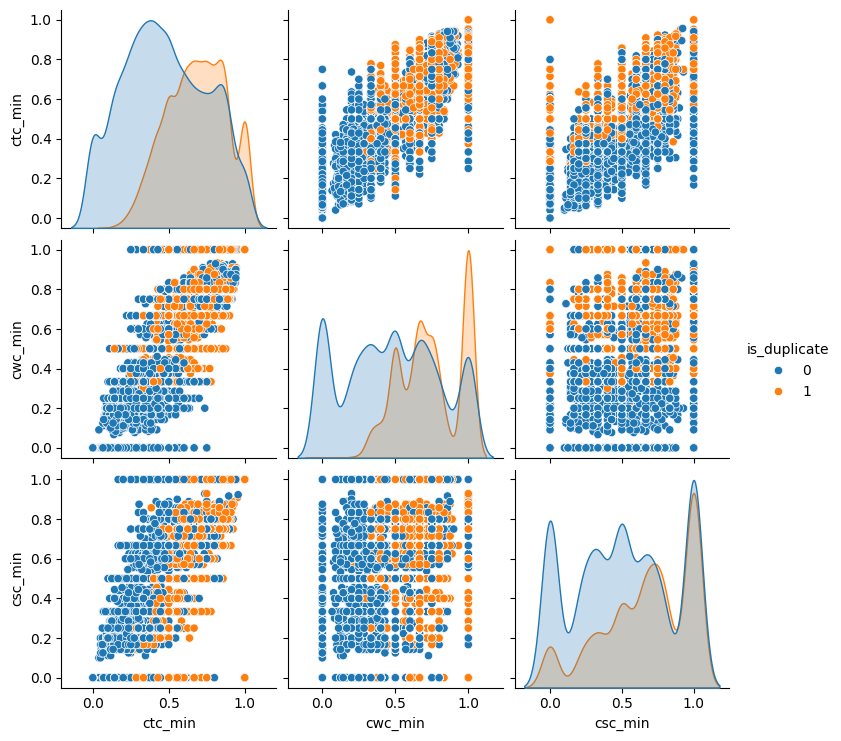

In [119]:
#EDA

sb.pairplot(p_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue = 'is_duplicate')

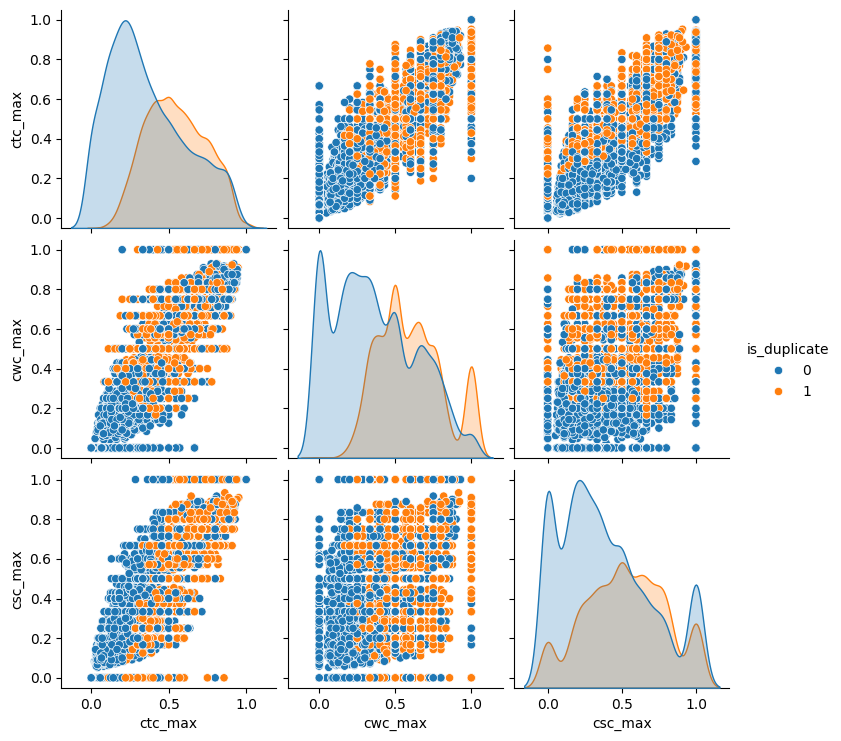

In [120]:
#EDA

sb.pairplot(p_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue = 'is_duplicate')

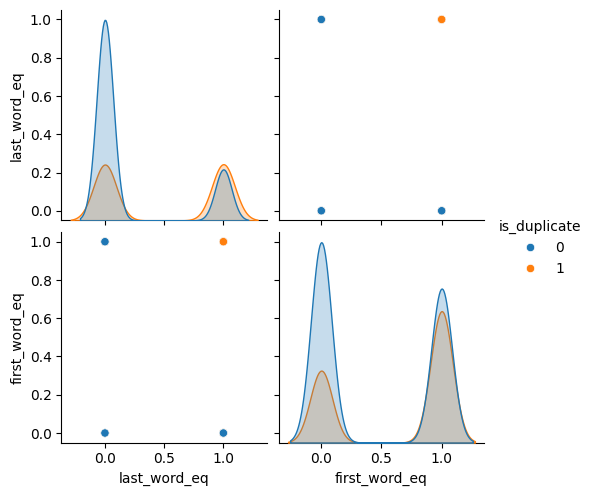

In [121]:
sb.pairplot(p_df[['last_word_eq','first_word_eq','is_duplicate']], hue = 'is_duplicate')

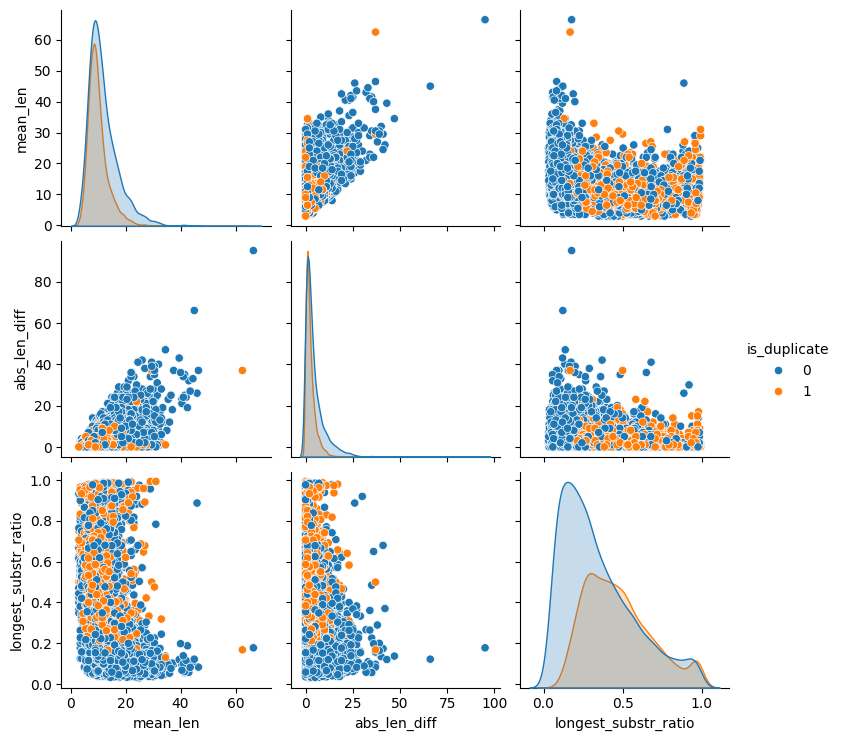

In [122]:
sb.pairplot(p_df[['mean_len','abs_len_diff', 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

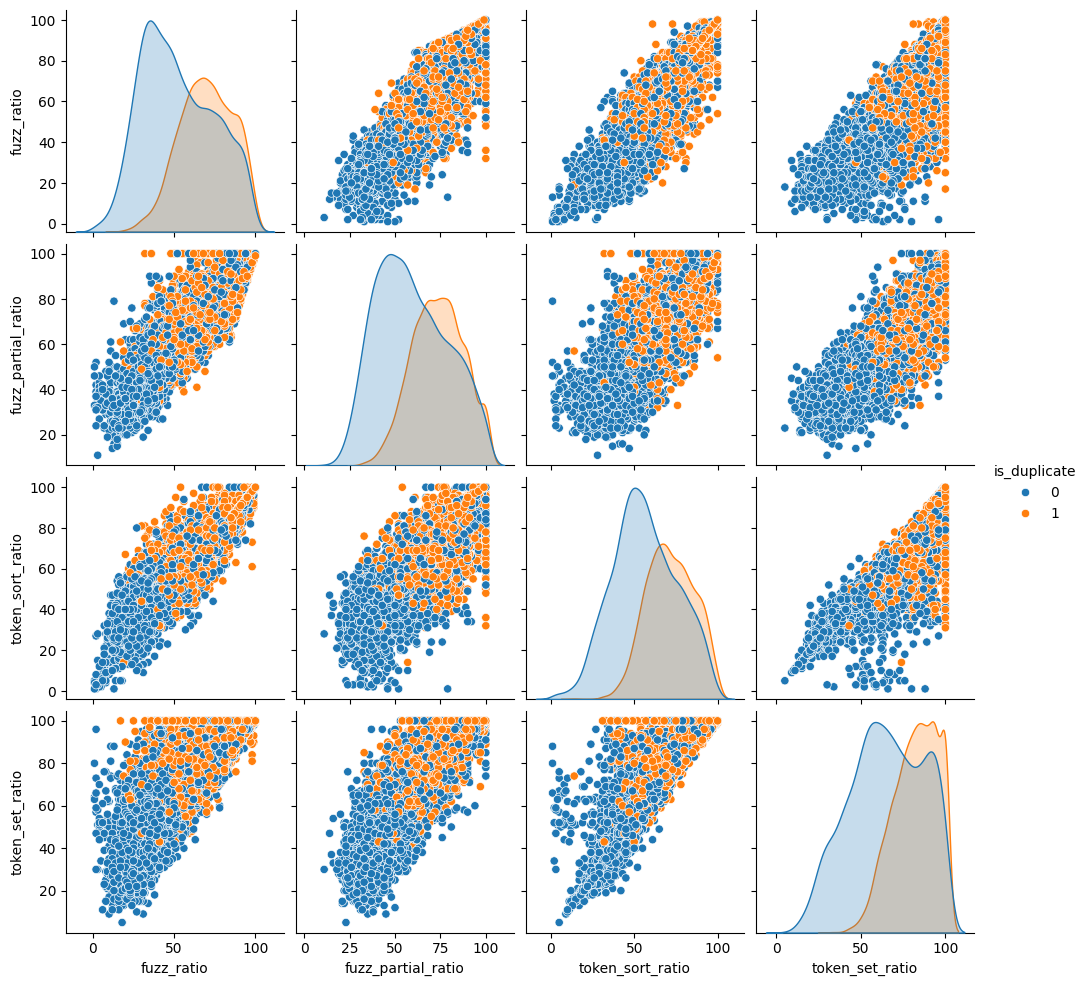

In [123]:
sb.pairplot(p_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']], hue = 'is_duplicate')

In [124]:
#Use TSNE for Dimentionality refuction for 15 feature(Generated after cleaning the data) to 3 dimention
from sklearn.preprocessing import MinMaxScaler

In [125]:
x = MinMaxScaler().fit_transform(p_df[['ctc_min', 'cwc_min', 'csc_min','mean_len','abs_len_diff', 'longest_substr_ratio','fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio', 'token_set_ratio','is_duplicate']])

In [126]:
y = p_df['is_duplicate'].values

In [127]:
from sklearn.manifold import TSNE

In [128]:
tsne2d = TSNE(
    n_components=2,
    init = 'random',#pca
    random_state=101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle =0.5
).fit_transform(x)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 0.948s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.088840
[t-SNE] Computed conditional probabilities in 0.302s
[t-SNE] Iteration 50: error = 96.4153595, gradient norm = 0.0450677 (50 iterations in 6.303s)
[t-SNE] It

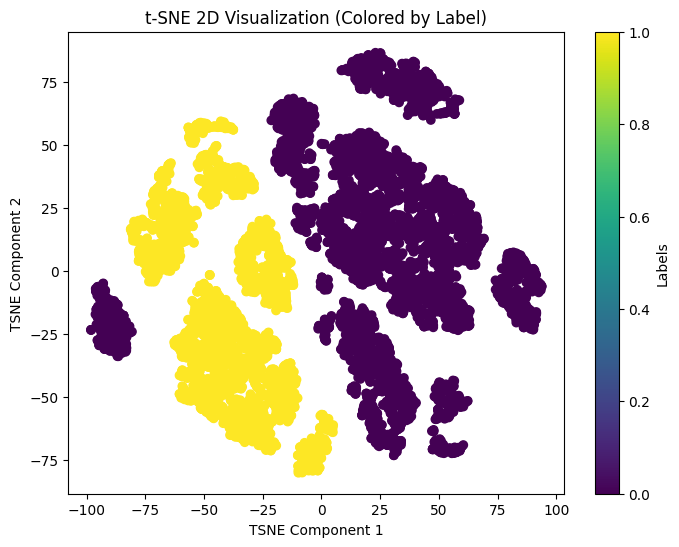

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(tsne2d[:,0], tsne2d[:,1], c=y, cmap='viridis')
plt.title("t-SNE 2D Visualization (Colored by Label)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(scatter, label="Labels")
plt.show()


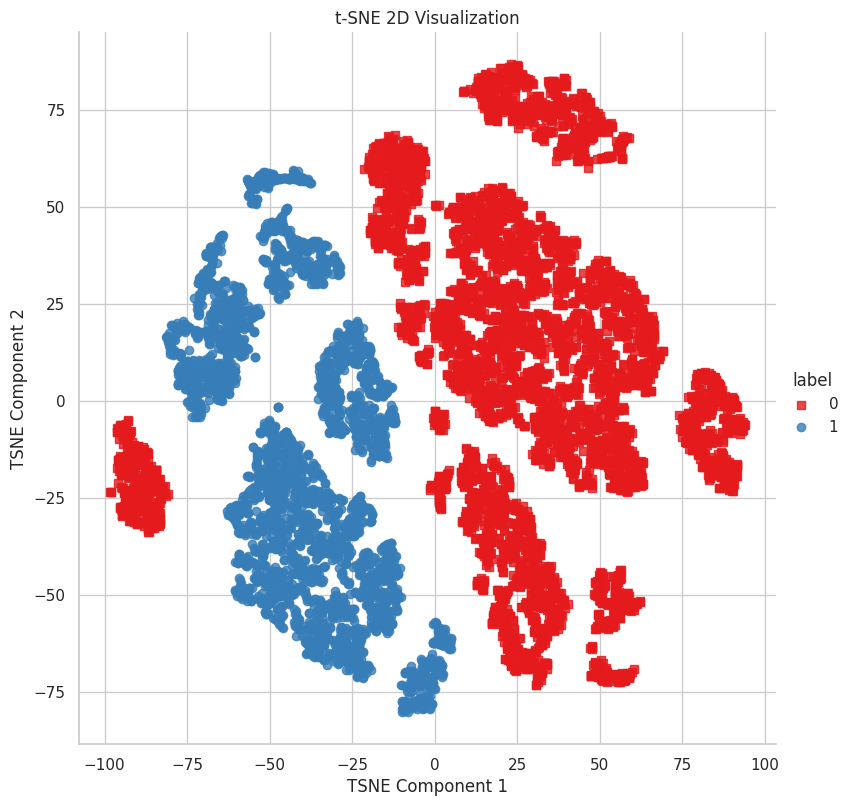

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from t-SNE vectors
x_df = pd.DataFrame({
    'x': tsne2d[:, 0],
    'y': tsne2d[:, 1],
    'label': y
})

# Plot using seaborn
sns.set(style="whitegrid")

sns.lmplot(
    data=x_df,
    x='x',
    y='y',
    hue='label',
    fit_reg=False,
    height=8,
    palette="Set1",
    markers=['s', 'o']
)

plt.title("t-SNE 2D Visualization")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


In [131]:
# tsne3d = TSNE(
#     n_components=3,
#     init = 'random',#pca
#     random_state=101,
#     method = 'barnes_hut',
#     n_iter = 1000,
#     verbose = 2,
#     angle =0.5
# ).fit_transform(x)

In [132]:
!pip install plotly

In [133]:
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [134]:
q_df

,question1,question2
169378,What is a swamp? How are they formed?,How are swamps formed?
314262,How do I heal zepto malware infected files in ...,How can I get rid of malware in my computer?
162006,How do I know if I'm pretty or not?,How do you know if you are pretty?
164771,What is the best way to prepare for GATE in CS...,Will we get control of intractable brain disea...
351681,How does cum taste?,What does cum taste like?
...,...,...
19805,What are the benefits of reading books?,What are some benefits of reading?
310237,What are some biblical examples of God giving ...,"If God doesn't give more than one can handle, ..."
157196,How can I know my wife has had an affair?,How can I know if my wife is a cheater?
279409,What is the difference between GMO and selecti...,What is the difference between GMOs and conven...


In [135]:
final_df = p_df.drop(columns= ['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(10000, 25)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
169378,1,35,21,8,4,3,12,0.25,8,4,...,0.374995,1,0,4,6.0,0.363636,54,75,71,80
314262,0,57,43,11,10,6,21,0.29,11,10,...,0.545450,1,1,1,10.5,0.340909,66,56,64,79
162006,1,35,33,9,8,5,16,0.31,10,8,...,0.499995,0,1,2,9.0,0.264706,74,76,68,84
164771,0,77,78,17,12,0,29,0.00,17,12,...,0.000000,0,0,5,14.5,0.038462,32,36,19,19
351681,1,18,24,4,5,3,9,0.33,4,5,...,0.599988,0,0,1,4.5,0.789474,76,89,71,88


In [136]:
final_df.columns

Index(['is_duplicate', 'q1_len', 'q2_len', 'q1_num_word', 'q2_num_word',
       'word_common', 'word_total', 'word_share', 'q1_num_words',
       'q2_num_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

#merge texts

question = list(q_df['question1']) + list(q_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(), 2)

In [138]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
169378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
164771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
temp_df.shape

(10000, 6000)

In [140]:
# temp_df

In [141]:
total_df = pd.concat([final_df, temp_df], axis = 1)
print(total_df.shape)
total_df.head()

(10000, 6025)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,word_total,word_share,q1_num_words,q2_num_words,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
169378,1,35,21,8,4,3,12,0.25,8,4,...,0,0,0,0,0,0,0,0,0,0
314262,0,57,43,11,10,6,21,0.29,11,10,...,0,0,0,0,0,0,0,0,0,0
162006,1,35,33,9,8,5,16,0.31,10,8,...,0,0,0,2,0,0,0,0,0,0
164771,0,77,78,17,12,0,29,0.00,17,12,...,0,0,0,0,0,0,0,0,0,0
351681,1,18,24,4,5,3,9,0.33,4,5,...,0,0,0,0,0,0,0,0,0,0


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x = total_df.iloc[:,1:]
x.shape


(10000, 6024)

In [144]:
y = total_df.iloc[:,0]
y

,is_duplicate
169378,1
314262,0
162006,1
164771,0
351681,1
...,...
19805,1
310237,0
157196,1
279409,1


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state  = 32)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [147]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7545

In [148]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [149]:
y_pred1 = xgb.predict(x_test)
accuracy_score(y_test, y_pred1)


0.7585

In [150]:
from sklearn.metrics import confusion_matrix

In [151]:
#for random forest model
confusion_matrix(y_test, y_pred)

array([[1019,  239],
       [ 252,  490]])

In [152]:
#for xgboost model
confusion_matrix(y_test, y_pred1)

array([[1010,  248],
       [ 235,  507]])

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [154]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
y_pred1 = lr.predict(x_test)
accuracy_score(y_test, y_pred1)


0.709

In [156]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [157]:
y_pred1 = lr.predict(x_test)
accuracy_score(y_test, y_pred1)

0.709

In [158]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [159]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [160]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [161]:
from difflib import SequenceMatcher

def test_fetch_length_features(q1, q2):
    length_features = [0.0]*3

    # Converting the sentences into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest common substring ratio
    match = SequenceMatcher(None, q1, q2).find_longest_match(0, len(q1), 0, len(q2))
    lcs_len = match.size  # length of the longest common substring
    length_features[2] = lcs_len / (min(len(q1), len(q2)) + 1)

    return length_features


In [162]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [163]:
from difflib import SequenceMatcher
from nltk.corpus import stopwords
import numpy as np
from fuzzywuzzy import fuzz

def query_point_creator(q1, q2):
    STOP_WORDS = set(stopwords.words("english"))
    input_query = []

    # Preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # 1️⃣ Basic features
    input_query.append(len(q1))               # q1_len
    input_query.append(len(q2))               # q2_len
    input_query.append(len(q1.split(" ")))    # q1_num_word
    input_query.append(len(q2.split(" ")))    # q2_num_word
    input_query.append(test_common_words(q1, q2))  # word_common
    input_query.append(test_total_words(q1, q2))   # word_total
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))  # word_share

    # 2️⃣ Token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # 3️⃣ Length features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # 4️⃣ Fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # 5️⃣ Non-stopword counts (to match training features q1_num_words, q2_num_words)
    q1_tokens_nonstop = [w for w in q1.split() if w.lower() not in STOP_WORDS]
    q2_tokens_nonstop = [w for w in q2.split() if w.lower() not in STOP_WORDS]
    input_query.append(len(q1_tokens_nonstop))  # q1_num_words
    input_query.append(len(q2_tokens_nonstop))  # q2_num_words

    # Convert to numpy array
    input_query = np.array(input_query).reshape(1, -1)

    # 6️⃣ BoW features
    q1_bow = cv.transform([q1]).toarray()
    q2_bow = cv.transform([q2]).toarray()

    # Combine custom + BoW features
    feature_vector = np.hstack((input_query, q1_bow, q2_bow))

    return feature_vector


In [164]:
# Index([ 'q1_len', 'q2_len', 'q1_num_word', 'q2_num_word',
#        'word_common', 'word_total', 'word_share', 'q1_num_words',
#        'q2_num_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
#        'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
#        'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
#        'token_sort_ratio', 'token_set_ratio'],
#       dtype='object')

In [165]:
q1 = 'Where is the capital of Bangladesh?'
q2 = 'What is the current capital of UK?'
q3 = 'Which city serves as the capital of Bangladesh?'
q4 = 'What is the business capital of UK?'

In [166]:
# x = query_point_creator(q1, q2)

In [167]:
rf.predict(query_point_creator(q1, q2))

array([0])

In [169]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [171]:
import pickle

In [173]:
pickle.dump(rf, open('/content/question-pairs-dataset/model.pkl', 'wb'))
pickle.dump(cv, open('/content/question-pairs-dataset/cv.pkl', 'wb'))